In [1]:
#######import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1

In [2]:
#######import "InterviewData_Cost.csv" file
#######assign to data1
data1 = pd.read_csv("C:/Users/oyeye/Downloads/InterviewData_Cost.csv")

In [3]:
#######import "InterviewData_Rev.csv" file
#######assign to data2
data2 = pd.read_csv("C:/Users/oyeye/Downloads/InterviewData_Rev.csv")

In [4]:
##########merge datasets data1 and data2
##########assign to data3
data3 = pd.merge(data1, data2, how = 'outer', on = ['date', 'source_id'])

In [5]:
data3.head()

,date,source_id,cost,revenue
0,10/17/2014,PA0577,7168.0,8417.0
1,8/17/2014,PA0354,7615.0,4200.0
2,1/7/2014,PA0607,4054.0,7935.0
3,8/25/2014,PA0745,9317.0,5536.0
4,11/30/2014,PA0923,5586.0,NaN


In [6]:
########all rows returned from the two datasets
data3.shape

(14618, 4)

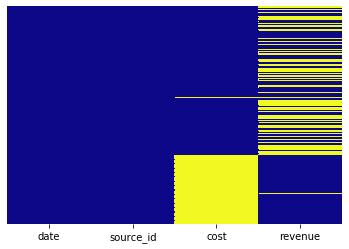

In [7]:
#########Show missing values after merge
sns.heatmap(data3.isnull(), yticklabels = False, cbar = False, cmap = 'plasma')

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
date         10000 non-null object
source_id    10000 non-null object
cost         9900 non-null float64
dtypes: float64(1), object(2)
memory usage: 234.5+ KB


# Question 2

In [9]:
##########Join datasets data1 and data2 returning only the rows from the cost file
##########assign to data4
data4 = pd.merge(data1, data2, how = 'left', on = ['date', 'source_id'])

In [10]:
data4.shape

(10000, 4)

In [11]:
data4.head()

,date,source_id,cost,revenue
0,10/17/2014,PA0577,7168.0,8417.0
1,8/17/2014,PA0354,7615.0,4200.0
2,1/7/2014,PA0607,4054.0,7935.0
3,8/25/2014,PA0745,9317.0,5536.0
4,11/30/2014,PA0923,5586.0,NaN


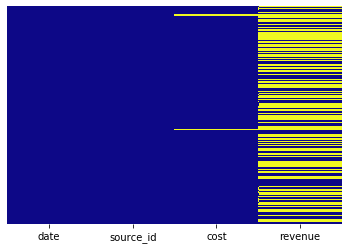

In [12]:
#########Show missing values after join
sns.heatmap(data4.isnull(), yticklabels = False, cbar = False, cmap = 'plasma')

In [13]:
data3.head()

,date,source_id,cost,revenue
0,10/17/2014,PA0577,7168.0,8417.0
1,8/17/2014,PA0354,7615.0,4200.0
2,1/7/2014,PA0607,4054.0,7935.0
3,8/25/2014,PA0745,9317.0,5536.0
4,11/30/2014,PA0923,5586.0,NaN


In [14]:
##########sort the revenue column in descending order and assign to newdata
newdata = data3.sort_values(by = ['revenue'], ascending = False)

#########check for the top 4 source
newdata.head(4)

,date,source_id,cost,revenue
3322,1/11/2014,PA0202,9637.0,12000.0
3176,1/17/2014,PA0057,1691.0,11999.0
11738,12/8/2014,PA0751,NaN,11999.0
13007,11/25/2014,PA0527,NaN,11997.0


In [15]:
data3['source_id'].unique()

array(['PA0577', 'PA0354', 'PA0607', 'PA0745', 'PA0923', 'PA0808',
       'PA0952', 'PA0411', 'PA0526', 'PA0168', 'PA0277', 'PA0057',
       'PA0482', 'PA0368', 'PA0552', 'PA0696', 'PA0258', 'PA0338',
       'PA0619', 'PA0270', 'PA0474', 'PA0958', 'PA0308', 'PA0830',
       'PA0752', 'PA0859', 'PA0174', 'PA0792', 'PA0732', 'PA0318',
       'PA0293', 'PA0198', 'PA0202', 'PA0843', 'PA0873', 'PA0973',
       'PA0394', 'PA0751', 'PA0169', 'PA0352', 'PA0126', 'PA0672',
       'PA0900', 'PA0527', 'PA0534', 'PA0470', 'PA0543', 'PA0467',
       'PA0678', 'PA0659'], dtype=object)

In [16]:
data3['source_id'].value_counts()

PA0843    308
PA0352    307
PA0659    305
PA0202    305
PA0338    304
PA0534    303
PA0368    301
PA0527    301
PA0830    301
PA0607    300
PA0411    299
PA0900    299
PA0258    297
PA0792    296
PA0751    296
PA0696    295
PA0318    295
PA0482    294
PA0732    294
PA0958    294
PA0752    294
PA0923    294
PA0577    294
PA0394    293
PA0543    293
PA0308    292
PA0174    292
PA0470    292
PA0808    291
PA0474    291
PA0198    290
PA0619    290
PA0277    290
PA0973    289
PA0952    289
PA0270    289
PA0873    288
PA0169    288
PA0293    287
PA0552    287
PA0526    286
PA0467    286
PA0126    286
PA0672    283
PA0354    282
PA0168    278
PA0678    278
PA0745    278
PA0057    278
PA0859    276
Name: source_id, dtype: int64

# Question 3

In [17]:
##########Top 4 sources in terms of revenue generation
newdata = pd.DataFrame(data3.groupby(['source_id'])['revenue'].sum())
dff = newdata.sort_values(by = ['revenue'], ascending = False).head(4)

In [18]:
dff

,revenue
source_id,
PA0527,1385747.0
PA0308,1338615.0
PA0352,1309685.0
PA0552,1283190.0


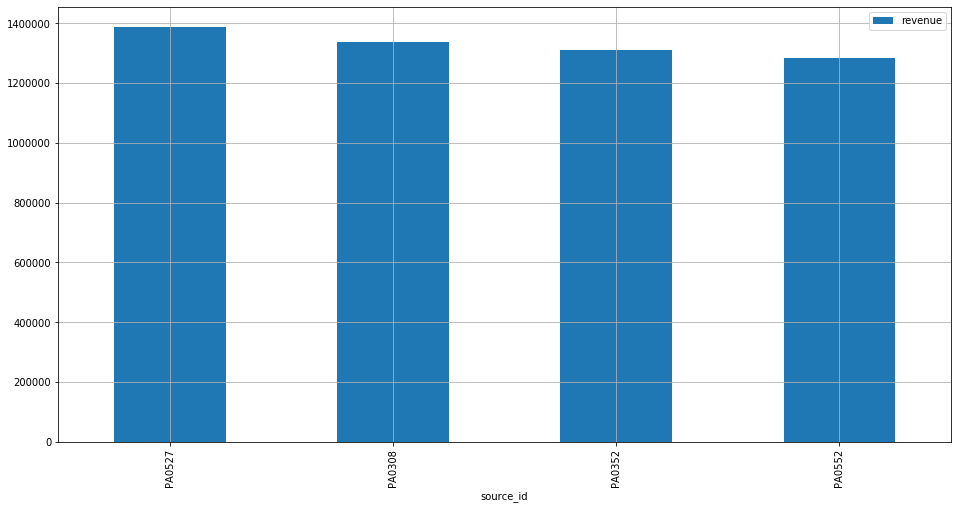

In [19]:
#########Visualisation of monthly revenue
dff.plot(kind = 'bar', figsize = (16, 8))
plt.grid()
plt.show()

In [20]:
###########select 'PA0527' source_id values and assign to ndata
ndata = data3.loc[data3['source_id'] == 'PA0527']

In [21]:
ndata

,date,source_id,cost,revenue
101,6/17/2014,PA0527,8950.0,6212.0
110,4/25/2014,PA0527,488.0,5903.0
126,8/28/2014,PA0527,1853.0,NaN
157,7/1/2014,PA0527,1444.0,10283.0
186,8/29/2014,PA0527,9397.0,233.0
...,...,...,...,...
14455,5/26/2014,PA0527,NaN,2744.0
14483,6/13/2014,PA0527,NaN,10881.0
14504,6/2/2014,PA0527,NaN,11644.0
14517,11/24/2014,PA0527,NaN,8219.0


In [22]:
#########Convert date to datetime
ndata['date'] = pd.to_datetime(ndata['date'])

C:\Users\oyeye\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
###########Assign to result
result = ndata.groupby(pd.Grouper(key = 'date', freq = '1M')).sum()
result.index = result.index.strftime("%B")

In [24]:
#######Make month the index
result.index.name = 'month'

In [25]:
df = result.drop(['cost'], axis = 1)

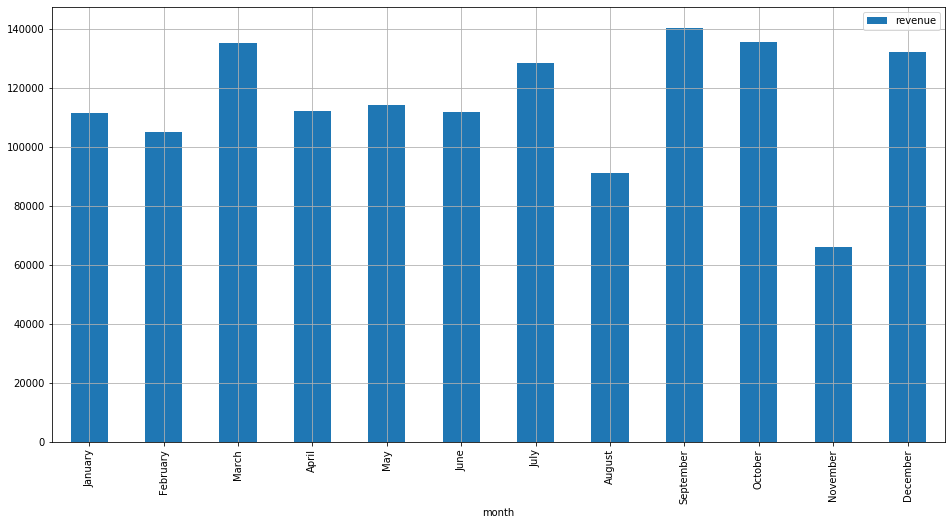

In [26]:
#########Visualisation of monthly revenue for 'PA0527' source_id
df.plot(kind = 'bar', figsize = (16, 8))
plt.grid()
plt.show()

In [27]:
###########select 'PA0308' source_id values and assign to ndata
ndata1 = data3.loc[data3['source_id'] == 'PA0308']

In [28]:
#########Convert date to datetime
ndata1['date'] = pd.to_datetime(ndata1['date'])

C:\Users\oyeye\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
###########Assign to result1
result1 = ndata1.groupby(pd.Grouper(key = 'date', freq = '1M')).sum()
result1.index = result1.index.strftime("%B")

In [30]:
#######Make month the index
result1.index.name = 'month'

In [31]:
df1 = result1.drop(['cost'], axis = 1)

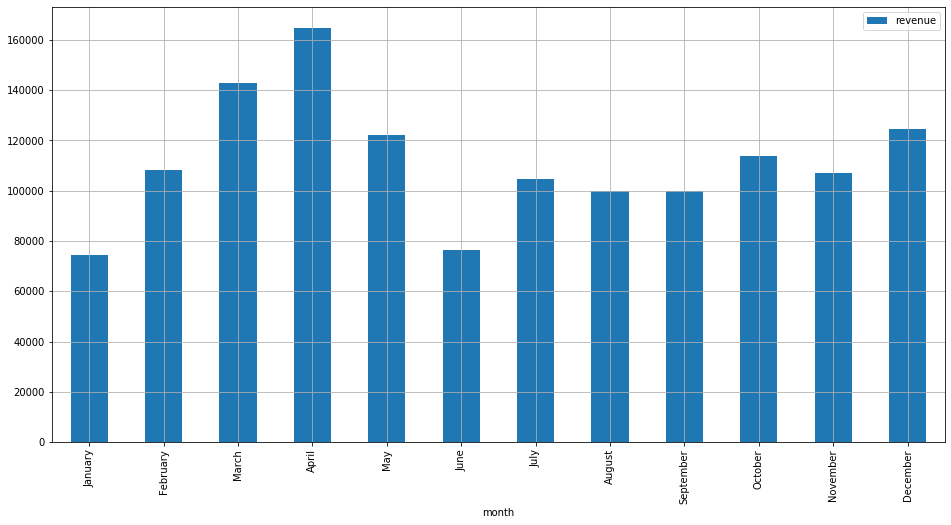

In [32]:
#########Visualisation of monthly revenue for 'PA0308' source_id
df1.plot(kind = 'bar', figsize = (16, 8))
plt.grid()
plt.show()

In [33]:
###########select 'PA0352' source_id values and assign to ndata
ndata2 = data3.loc[data3['source_id'] == 'PA0352']

In [34]:
#########Convert date to datetime
ndata2['date'] = pd.to_datetime(ndata2['date'])

C:\Users\oyeye\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
###########Assign to result1
result2 = ndata2.groupby(pd.Grouper(key = 'date', freq = '1M')).sum()
result2.index = result2.index.strftime("%B")

#######Make month the index
result2.index.name = 'month'

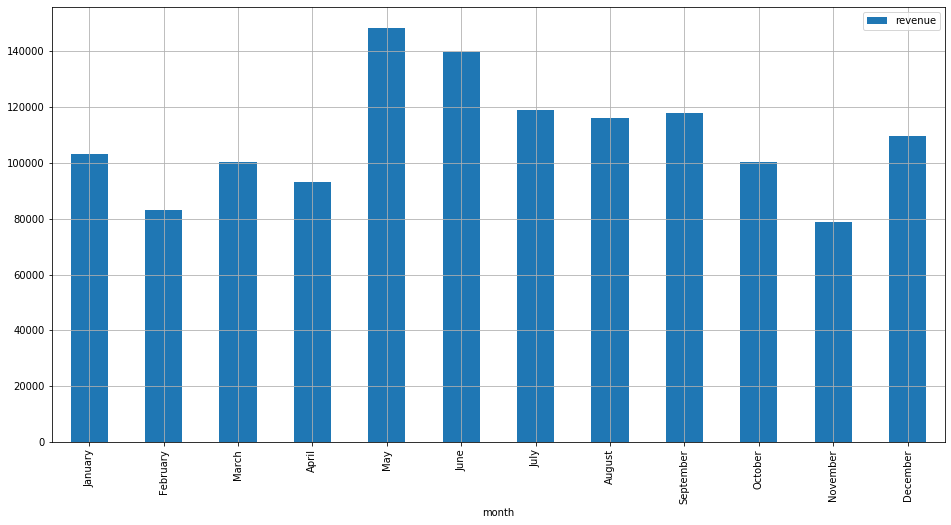

In [36]:
df2 = result2.drop(['cost'], axis = 1)
#########Visualisation of monthly revenue for 'PA0352' source_id
df2.plot(kind = 'bar', figsize = (16, 8))
plt.grid()
plt.show()

In [37]:
###########select 'PA0552' source_id values and assign to ndata
ndata3 = data3.loc[data3['source_id'] == 'PA0552']

In [38]:
ndata3

,date,source_id,cost,revenue
16,3/29/2014,PA0552,7894.0,NaN
22,8/21/2014,PA0552,4653.0,NaN
65,12/20/2014,PA0552,2092.0,NaN
115,10/30/2014,PA0552,4432.0,6626.0
159,8/13/2014,PA0552,9841.0,2771.0
...,...,...,...,...
14431,6/9/2014,PA0552,NaN,2344.0
14462,5/26/2014,PA0552,NaN,10615.0
14469,9/29/2014,PA0552,NaN,8387.0
14484,1/13/2014,PA0552,NaN,3568.0


In [39]:
#########Convert date to datetime
ndata3['date'] = pd.to_datetime(ndata3['date'])

C:\Users\oyeye\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
###########Assign to result2
result3 = ndata3.groupby(pd.Grouper(key = 'date', freq = '1M')).sum()
result3.index = result3.index.strftime("%B")

In [41]:
#######Make month the index
result3.index.name = 'month'

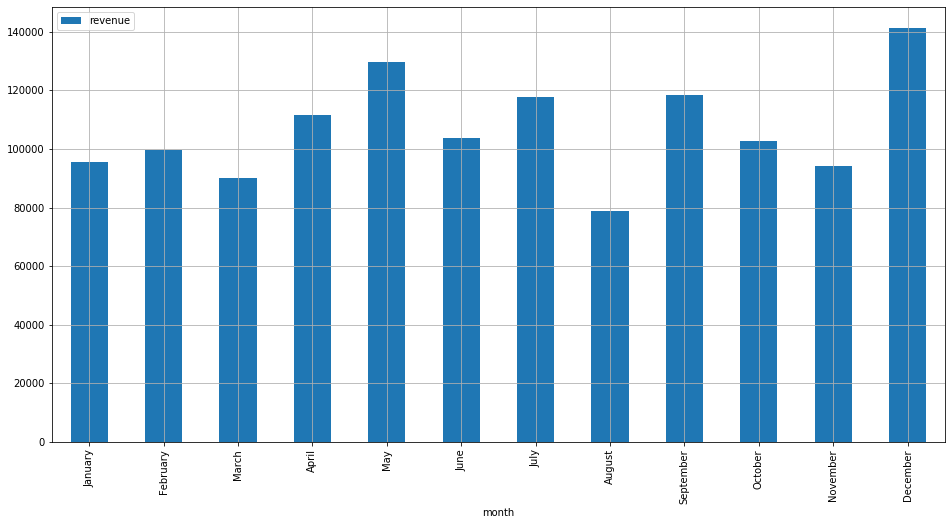

In [42]:
df3 = result3.drop(['cost'], axis = 1)
#########Visualisation of monthly revenue for 'PA0552' source_id
df3.plot(kind = 'bar', figsize = (16, 8))
plt.grid()
plt.show()

# Questions 4 & 5

In [43]:
########import InterviewData_Activity.csv file
data_act = pd.read_csv("C:/Users/oyeye/Downloads/InterviewData_Activity.csv")

In [44]:
data_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5420 entries, 0 to 5419
Data columns (total 7 columns):
userid               5420 non-null object
date                 5420 non-null object
age                  5420 non-null int64
gender               5420 non-null object
metropolitan_area    5420 non-null object
device_type          5420 non-null object
active               5420 non-null int64
dtypes: int64(2), object(5)
memory usage: 296.5+ KB


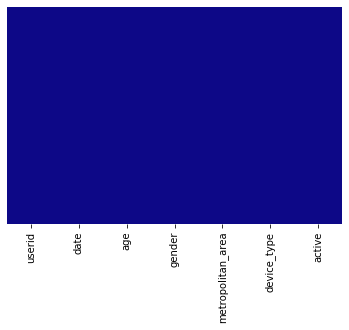

In [45]:
sns.heatmap(data_act.isnull(), yticklabels = False, cbar = False, cmap = 'plasma')

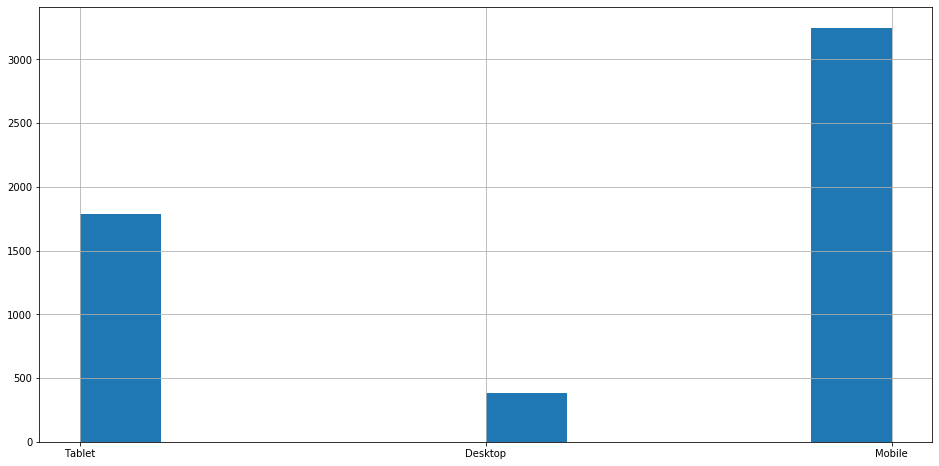

In [46]:
data_act["device_type"].hist(figsize = (16, 8))

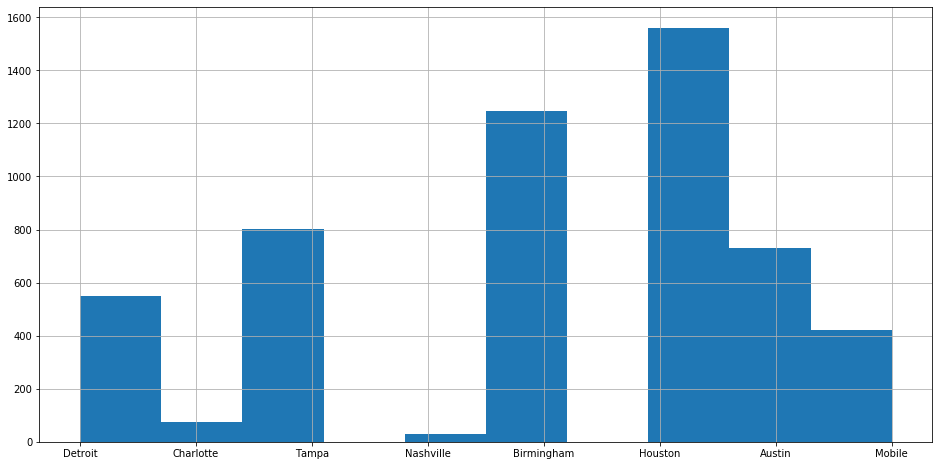

In [47]:
data_act["metropolitan_area"].hist(figsize = (16, 8))

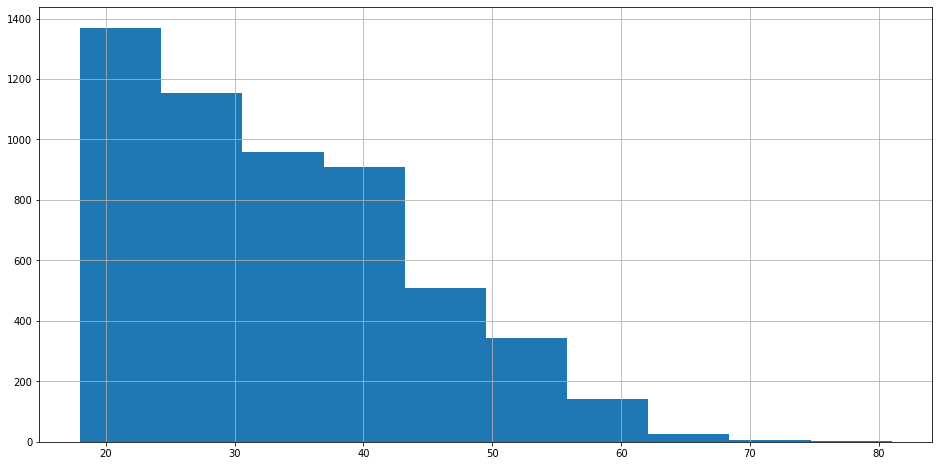

In [48]:
data_act["age"].hist(figsize = (16, 8))

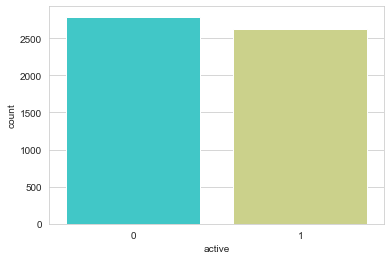

In [49]:
#########import libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.countplot(x = "active", data = data_act, palette='rainbow')

In [50]:
#######Percentage of employees who Churned or Stayed
n_active = len(data_act)
print((data_act["active"].value_counts()/n_active)*100)

0    51.476015
1    48.523985
Name: active, dtype: float64


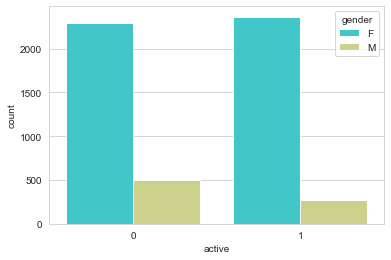

In [51]:
sns.set_style("whitegrid")
sns.countplot(x = "active", hue = 'gender', data = data_act, palette = 'rainbow')

In [53]:
#######gender percentage
n_active = len(data_act)
print((data_act["gender"].value_counts()/n_active)*100)

F    85.811808
M    14.188192
Name: gender, dtype: float64


In [54]:
######Assign dummy variables to gender column
gen = pd.get_dummies(data_act["gender"])

#########Drop the "M" column
gen = gen.drop("M", axis = 1)

In [55]:
########Drop "gender" column from data_act
data_act = data_act.drop("gender", axis = 1)

In [56]:
#########Join created dummy variables for gender to data_act
data_act = data_act.join(gen)

In [57]:
######Assign dummy variables to metropolitan_area column
met = pd.get_dummies(data_act["metropolitan_area"])

#########Drop the "Mobile" column
met = met.drop("Mobile", axis = 1)

In [58]:
########Drop "metropolitan_area" column from data_act
data_act = data_act.drop("metropolitan_area", axis = 1)

In [59]:
#########Join created dummy variables for metropolitan_area to data_act
data_act = data_act.join(met)

In [60]:
######Assign dummy variables to device_type column
dev = pd.get_dummies(data_act["device_type"])

#########Drop the "Mobile" column
dev = dev.drop("Mobile", axis = 1)

In [61]:
########Drop "device_type" column from data_act
data_act = data_act.drop("device_type", axis = 1)

In [62]:
#########Join created dummy variables for metropolitan_area to data_act
data_act = data_act.join(dev)

In [63]:
data_act

,userid,date,age,active,F,Austin,Birmingham,Charlotte,Detroit,Houston,Nashville,Tampa,Desktop,Tablet
0,4e3a9ea937b3a,8/4/2015,30,1,1,0,0,0,1,0,0,0,0,1
1,4e3dd5154a08c,8/6/2015,43,1,1,0,0,1,0,0,0,0,1,0
2,4e3df1ecd131a,8/6/2015,41,1,1,0,0,0,0,0,0,1,0,0
3,4e4e77461b1e3,8/19/2015,56,1,1,0,0,0,0,0,1,0,1,0
4,4e4eb59b6de55,8/19/2015,33,1,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5415,4e9cce2b66d44,10/17/2015,21,0,0,0,0,0,0,1,0,0,0,1
5416,4f2ab00039f50,2/2/2016,42,0,1,0,1,0,0,0,0,0,0,0
5417,4e642e7208f6b,9/4/2015,40,0,1,0,0,0,0,1,0,0,0,0
5418,4f40149878765,2/18/2016,40,0,1,0,0,0,0,1,0,0,0,0


In [64]:
df = pd.DataFrame(data_act)
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

,age,active,F,Austin,Birmingham,Charlotte,Detroit,Houston,Nashville,Tampa,Desktop,Tablet
age,1,0.089,0.014,0.06,-0.032,0.011,-0.00049,-0.17,0.051,0.11,0.1,-0.018
active,0.089,1,0.11,0.038,0.04,-0.047,0.018,-0.092,0.078,0.058,0.006,0.047
F,0.014,0.11,1,0.027,0.046,-0.028,-0.029,-0.04,0.017,-0.0016,0.031,0.03
Austin,0.06,0.038,0.027,1,-0.22,-0.047,-0.13,-0.25,-0.03,-0.16,-0.11,-0.04
Birmingham,-0.032,0.04,0.046,-0.22,1,-0.065,-0.18,-0.35,-0.041,-0.23,-0.15,0.1
Charlotte,0.011,-0.047,-0.028,-0.047,-0.065,1,-0.04,-0.076,-0.009,-0.05,0.21,-0.067
Detroit,-0.00049,0.018,-0.029,-0.13,-0.18,-0.04,1,-0.21,-0.026,-0.14,-0.093,0.099
Houston,-0.17,-0.092,-0.04,-0.25,-0.35,-0.076,-0.21,1,-0.048,-0.27,-0.17,0.17
Nashville,0.051,0.078,0.017,-0.03,-0.041,-0.009,-0.026,-0.048,1,-0.032,0.19,-0.048
Tampa,0.11,0.058,-0.0016,-0.16,-0.23,-0.05,-0.14,-0.27,-0.032,1,-0.11,-0.22


In [65]:
df = data_act.drop(['userid', 'date'], axis = 1)

In [71]:
#########Set the active column as target
target = df["active"]

In [72]:
########Set every other column as features
features = df.drop("active", axis = 1)

In [73]:
#########Split data into train and test
from sklearn.model_selection import train_test_split

#########Split into train size = 0.75, test size = 0.25
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.25, random_state=42)

In [74]:
#######Precision score
from sklearn.metrics import precision_score

########Recall score
from sklearn.metrics import recall_score

#######ROC/AUC score
from sklearn.metrics import roc_auc_score

In [75]:
#########import logistic regression model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state = 42, class_weight = "balanced")

#######application of the model to fit features to target in the training set
logmodel.fit(features_train, target_train)

#######Make prediction using the test set
prediction_best = logmodel.predict(features_test)

#######accuracy score for training set
print("Training set accuracy:", logmodel.score(features_train, target_train)*100)

#######accuracy score for test set
print("Test set accuracy:", logmodel.score(features_test, target_test)*100)

#######Use precision score to compare target_test with prediction
print("Precision Score:", precision_score(target_test, prediction_best)*100)

#######Use recall score to compare target_test with prediction
print("Recall Score:", recall_score(target_test, prediction_best)*100)

#######Use ROC/AUC score to compare target_test with prediction
print("ROC/AUC Score:", roc_auc_score(target_test, prediction_best)*100)

Training set accuracy: 58.69618696186962
Test set accuracy: 57.71217712177121
Precision Score: 56.78704856787049
Recall Score: 66.86217008797654
ROC/AUC Score: 57.650995890942205


C:\Users\oyeye\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Question 6

In [76]:
########import InterviewData_Parsing.csv file
parsing = pd.read_csv("C:/Users/oyeye/Downloads/InterviewData_Parsing.csv")

In [77]:
newparsing = ("{" + parsing["data_to_parse"].str.strip("]")).apply(pd.io.json.loads)
nparsing = newparsing.str["value"].str.split(";", expand = True)
finalparsing = pd.concat([parsing, nparsing.add_prefix("value")], axis=1)
finalparsing.head()

,userid,data_to_parse,value0,value1,value2,value3
0,54f3ad9a29ada,"""value"":""N;U;A7;W""}]",N,U,A7,W
1,54f69f2de6aec,"""value"":""N;U;I6;W""}]",N,U,I6,W
2,54f650f004474,"""value"":""Y;U;A7;W""}]",Y,U,A7,W
3,54f52e8872227,"""value"":""N;U;I1;W""}]",N,U,I1,W
4,54f64d3075b72,"""value"":""Y;U;A7;W""}]",Y,U,A7,W


# Question B

The information which include name and general metropolitan area that we have on potential customers will serve as a basis 
for the following metrics - ad impressions, landing page clicks and conversions. Since the main goal is to drive more
conversions on the landing page then there is the need to focus on:
    
--- The total number of visitors who have visited the landing page
--- The total number of those visitors who have converted on the offer

landing page conversion rate = total number of visitors who converted / total number of visitors

It is important that as much as we have many visitors on the landing page, we must also have many of these visitors converting 
on the offer. A reporting system should be created for the data we have on name and general metropolitan area such that we can
use that to make effective recommendations to the marketing team for campaign optimization.

The reporting systemn will make it possible to visualize the visitors from each metropolitan area and the one with the highest
representations.

Marketing should be more and better targeted at visitors who convert from the most represented metropolitan areas.